## Исследование данных о российском кинопрокате



Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. 

Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

**Цель иссиледования:**


1.Изучить рынок российского кинопроката и выявить текущие тренды.


2.Изучить фильмы ,получившие гос. поддержку, и понять насколько такие фильмы интересны зрителю.


3.Узнать какие факторы влияют на появление новых трендов.

**Ход исследования**
Данные для исследования я получу из 2 файлов "/datasets/mkrf_movies.csv" и "/datasets/mkrf_shows.csv". Для начала нужно объединить их в 1 датасет.О качестве данных ничего неизвесто , поэтому перед исследованием необходимо проверить данные.

*Проверка данных пройдет в несколько этаппов:*

1.Я проверю данные на наличие ошибок и оценю их влияние на исследование.

2.На этапе пердобработки данных ,я найду возможность исправить все ошибки данных , которые не приведут к искажению исследования.

3.Создам необходимые столбцы и приступлю к исследовательскому анализу.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Спасибо большое за оформление оглавления к проекту. Так он выглядит более опрятно. 

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df1=pd.read_csv('C:/Users/boyah/.jupyter/mkrf_movies.csv')
df2=pd.read_csv('C:/Users/boyah/.jupyter/mkrf_shows.csv')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


*Заменим тип данных в столбце "puNumber" ,так мы сможем объединить две таблицы в одну*

In [10]:
df2['puNumber']=df2['puNumber'].astype('str')

In [11]:
df=pd.merge(df1,df2, on='puNumber',how='left')
df

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [13]:
df.describe()

,refundable_support,nonrefundable_support,budget,box_office
count,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


*В одной строке отсутствует номер прокатного удостоверения , это мешает нам преобразовать тип данных в данном столбце, заменим значение ячейки на 0*

In [14]:
df['puNumber']=df['puNumber'].replace(to_replace='нет', value='0')

In [15]:
df['puNumber']=df['puNumber'].astype('int32')

<div class="alert alert-info"> <b>Комментарий студента:</b> Сделано. </div>

*Преобразуем тип данных в столбце с датой в datatime*

In [16]:
df['show_start_date']=pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

*Преобразуем данные в столбце 'reitings'*

In [17]:
df['ratings']=df['ratings'].replace('%','',regex=False)
df['ratings']=pd.to_numeric(df['ratings'], errors='coerce')

In [18]:
df=df.rename(columns={'puNumber': 'pu_number'})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   pu_number              7486 non-null   int32         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [20]:
df.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [21]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
pu_number,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех

Странно почему не открывается. Попробуй тогда поискать библиотека называется missingno

*Заменим пропуски в столбцах с данными "refundable_support","nonrefundable_support","budget","financing_source", на 0 так как они не получили гос. поддержку, от этого и пропуски в данных*

In [22]:
columns_to_fill=['refundable_support','nonrefundable_support','budget','financing_source']

default_value= 0

for col in columns_to_fill:
    for index in df[col].index:
        if pd.isna(df.loc[index,col]):
            df.loc[index,col]=default_value

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

Значения-заглушки хорошо подходят тут, но поскольку везде заменяешь на 0, то можно было через цикл сразу проработать в нескольких столбцах.

<div class="alert alert-info"> <b>Комментарий студента:</b>Сделано

In [23]:
df[df['producer'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,0,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,0,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,8.3,"мелодрама,комедия",2700.0
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,7.8,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,0,7.0,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,7.0,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,0.0,0.0,0.0,0,7.9,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,7.0,"драма,мелодрама,военный",NaN


*Заменим данные в столбце 'producer'  на 'unknown'. Пропуски могли появится вовремя выгрузки данных*

In [24]:
df['producer']=df['producer'].fillna('unknown')

In [25]:
df[df['ratings'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",unknown,«6+» - для детей старше 6 лет,0.0,0.0,0.0,0,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,0.0,0.0,0.0,0,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,unknown,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,0,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,unknown,«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,0.0,0.0,0.0,0,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,NaN,NaN,219569.0
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,0,NaN,NaN,NaN


*Заменим столбец с названиями жанров "genres" на "unknown"

In [26]:
df['genres']=df['genres'].fillna('unknown')

*Пропуски в столбце "box_office" возможны из-за отсутствия доступа к данным , их можно оставить как есть или замениь на 0* 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Причины появления пропусков высказаны

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [27]:
df.duplicated().sum()

0

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [28]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [29]:
columns_to_clean=['type','film_studio','production_country','director','producer','age_restriction','genres']

for col in columns_to_clean:
    for index in df[col].index:
        if isinstance(df.loc[index,col], str):
            df.loc[index,col]=df.loc[index,col].strip()

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [30]:
df['refundable_support'].describe()

count    7.486000e+03
mean     5.261822e+05
std      5.781108e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.800000e+08
Name: refundable_support, dtype: float64

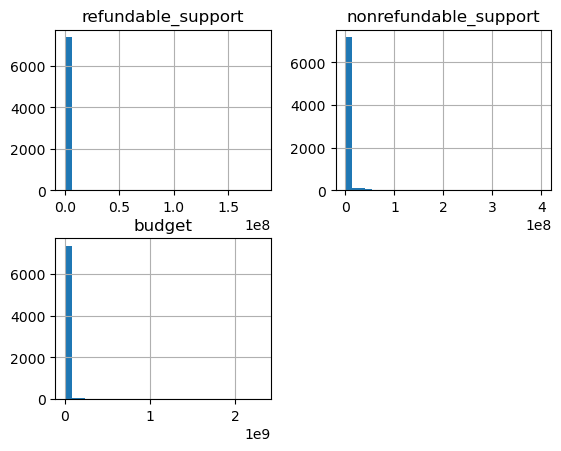

In [31]:
df[['refundable_support','nonrefundable_support','budget']].hist(bins=30);

In [32]:
df[(df['box_office'].notnull()) &(df['box_office']<10)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19 12:00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,unknown,«6+» - для детей старше 6 лет,0.0,0.0,0.0,0,7.7,"драма,биография,музыка",0.0
237,Подранки,111007613,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,unknown,«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,8.2,драма,0.0
596,Запах вереска,111003012,2012-05-23 12:00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,0.0,0.0,0.0,0,6.3,комедия,0.0
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",Германия - Нидерланды - Беларусь - Россия - Ла...,Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,6.5,"драма,военный,история",0.0
932,Письмо для Момо,124002912,2012-10-25 12:00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,7.4,"аниме,мультфильм,драма",0.0
933,Летние войны,124002812,2012-10-25 12:00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,7.7,"аниме,мультфильм,фантастика",0.0
976,Гарегин Нжде,131000213,2013-04-23 12:00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,7.9,биография,0.0
1126,Марафон,111006712,2012-12-18 12:00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,0.0,0.0,0.0,0,5.5,"комедия,мелодрама",0.0
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,5.8,"мелодрама,комедия,драма",0.0
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...",Германия - Бельгия - США -Франция,Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,0,6.9,драма,0.0


In [33]:
df[(df['budget']==0) &(df['refundable_support']>0)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3675,Чудо-юдо,114001817,2017-06-27 12:00:00,Анимационный,"ООО ""КиноФирма""",Россия,А.Лукичев,"ООО ""КиноФирма""",«6+» - для детей старше 6 лет,20000000.0,20000000.0,0.0,Фонд кино,5.2,"мультфильм,фэнтези,семейный",5.510801e+07
3739,Мифы,111004317,2017-06-07 12:00:00,Художественный,"ООО ""ХАЙПФИЛМ"", ООО ""Арт Пикчерс Студия""",Россия,А.Молочников,"Ф.Бондарчук, Д.Рудовский, И.Стюарт, М.Османн, ...",«16+» - для детей старше 16 лет,25000000.0,20000000.0,0.0,Фонд кино,4.8,комедия,5.045195e+07
5673,Селфи,111012117,2018-02-01 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Н.Хомерики,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,20000000.0,40000000.0,0.0,Фонд кино,5.8,"триллер,драма",2.251964e+08
5806,Два хвоста,114001018,2018-05-31 12:00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"В.Ровенский, Н.Лопато, В.Азеев","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,10000000.0,60000000.0,0.0,Фонд кино,5.0,"мультфильм,детский",1.065143e+08
6008,Принцесса и дракон,114003018,2018-08-23 12:00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,М.Нефедова,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,40000000.0,40000000.0,0.0,Фонд кино,5.2,"мультфильм,фэнтези,детский",8.336633e+07
6823,Большое путешествие,114002419,2019-04-20 12:00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"Н.Лопато, В.Ровенский","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,60000000.0,120000000.0,0.0,Фонд кино,6.2,"мультфильм,комедия,приключения",1.476068e+08


*Зсоздадим столбец где у нас будут храниться данные по общей гос поддержке*

In [34]:
df['total_support']=df['refundable_support']+df['nonrefundable_support']

*Заполним пропуски в столбце 'budget' донными о гос поддерки*

In [35]:
df.loc[(df['budget']==0) & (df['total_support']>0), 'budget']=df['total_support']
print(df[(df['budget']==df['total_support']) & (df['total_support']>0)])

                       title  pu_number     show_start_date            type  \
2053                     14+  111023614 2014-12-19 12:00:00  Художественный   
2058               Дуxless 2  111000415 2015-01-26 12:00:00  Художественный   
2472             Воин (2015)  111017315 2015-09-28 12:00:00  Художественный   
2532                 Бармен.  111009615 2015-05-26 12:00:00  Художественный   
2615     Савва. Сердце воина  114001715 2015-07-21 12:00:00    Анимационный   
2684          Тряпичный союз  111010215 2015-06-08 12:00:00  Художественный   
2788      Срочно выйду замуж  111017115 2015-09-30 12:00:00  Художественный   
2874       Помню - не помню!  111004916 2016-03-01 12:00:00  Художественный   
3047  Любовь с ограничениями  111008216 2016-04-29 12:00:00  Художественный   
3565       Притяжение (2016)  111018116 2016-12-16 12:00:00  Художественный   
3675                Чудо-юдо  114001817 2017-06-27 12:00:00    Анимационный   
3739                    Мифы  111004317 2017-06-07 1

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [36]:
df['year']=pd.DatetimeIndex(df['show_start_date']).year
df

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,total_support,year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,0,7.2,"боевик,драма,мелодрама",NaN,0.0,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.0,0.0,0.0,0,6.6,"драма,военный",NaN,0.0,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,0,6.8,"фантастика,боевик,триллер",NaN,0.0,2016
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,0,6.8,"фантастика,боевик,триллер",NaN,0.0,2016
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,0,6.8,"фантастика,боевик,триллер",NaN,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,NaN,unknown,NaN,0.0,2019
7482,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,0,5.4,"боевик,триллер",NaN,0.0,2019
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,0,NaN,unknown,NaN,0.0,2019
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,0,NaN,unknown,NaN,0.0,2019


In [37]:
df['general_producer']=df['producer'].str.split(',').str[0]
df['general_producer']

0         Дэвид Валдес
1              unknown
2           Джим Лемли
3           Джим Лемли
4           Джим Лемли
             ...      
7481       Фил Грабски
7482      Джефф Боулер
7483    Дженнифер Додж
7484         Д.Ловейко
7485         Д.Ловейко
Name: general_producer, Length: 7486, dtype: object

In [38]:
df['main_genres']=df['genres'].str.split(',').str[0]
df

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,total_support,year,general_producer,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,0,7.2,"боевик,драма,мелодрама",NaN,0.0,2015,Дэвид Валдес,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.0,0.0,0.0,0,6.6,"драма,военный",NaN,0.0,2016,unknown,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,0,6.8,"фантастика,боевик,триллер",NaN,0.0,2016,Джим Лемли,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,0,6.8,"фантастика,боевик,триллер",NaN,0.0,2016,Джим Лемли,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,0,6.8,"фантастика,боевик,триллер",NaN,0.0,2015,Джим Лемли,фантастика
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0.0,0.0,0.0,0,NaN,unknown,NaN,0.0,2019,Фил Грабски,unknown
7482,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,0,5.4,"боевик,триллер",NaN,0.0,2019,Джефф Боулер,боевик
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,0,NaN,unknown,NaN,0.0,2019,Дженнифер Додж,unknown
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0.0,0.0,0.0,0,NaN,unknown,NaN,0.0,2019,Д.Ловейко,unknown


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [39]:
df['share_support']=(df['total_support']/df['budget']*100).round(2)
df[df['share_support']>0]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,total_support,year,general_producer,main_genres,share_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,26500000.0,2013,А.Атанесян,драма,33.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,37142857.0,Министерство культуры,NaN,unknown,2.814000e+04,26000000.0,2014,А.Тютрюмов,unknown,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,107847945.0,2013,Р.Давлетьяров,комедия,61.27
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,28000000.0,2014,Л.Антонова,драма,69.01
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,25000000.0,2014,А.Миндадзе,драма,62.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,...,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,500000000.0,2019,А.Максимов,история,51.02
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,...,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,100000000.0,2019,С.Сельянов,мультфильм,52.63
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,...,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,500000000.0,2019,Ф.Бондарчук,фантастика,52.97
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,...,46154000.0,Министерство культуры,5.9,драма,NaN,30000000.0,2019,С.Зернов,драма,65.00


<div class="alert alert-info"> <b>Комментарий студента:</b> В предоработке данных мы обработали пропущенные  значения, проверили есть ли дубликаты, добавили новые столбцы , для дальнейшего исследования

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [40]:
df['year'].value_counts()

year
2010    985
2019    930
2018    891
2016    818
2014    807
2015    705
2013    630
2011    622
2012    593
2017    505
Name: count, dtype: int64

*Больше всего в прокат выходили фильмы в 2010г.*

*Посчитаем долю фильмов с указанной информацией о прокате в кинотеатрах*

In [41]:
has_box_office=df[df['box_office'].notnull() & df['box_office']>0]

In [42]:
total_movies=len(df)
movies_with_box_office=len(has_box_office)

In [43]:
share_movies=(movies_with_box_office/ total_movies*100)
share_movies

41.86481432006412

*Посмотрим как эта доля менялась по годам*

In [44]:
df['has_box_office']=df['box_office'].notnull().astype('int')

In [45]:
grouped=df.groupby('year')['has_box_office'].mean().reset_index()
grouped=grouped.rename(columns={'has_box_office' : 'share_with_box_office'})

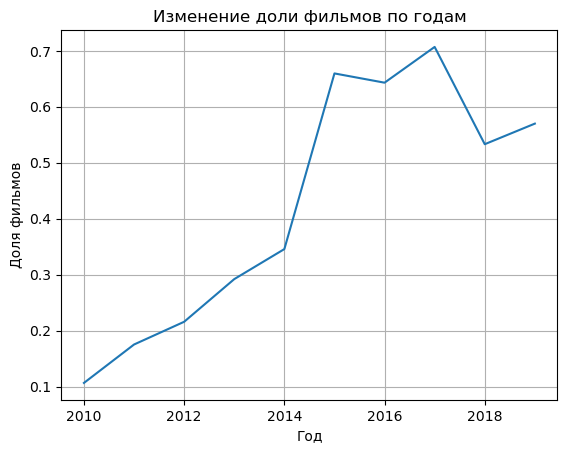

In [46]:
sns.lineplot(data=grouped, x='year', y='share_with_box_office')
plt.title('Изменение доли фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Доля фильмов')
plt.grid(True)
plt.show()

*По данным видно что в 2017 году было больше данных о сборах*

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [47]:
grouped_year=df.groupby('year')['box_office'].mean().reset_index()

C:\Users\boyah\AppData\Local\Temp\ipykernel_14868\304680024.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='box_office',data=grouped_year, palette='coolwarm')


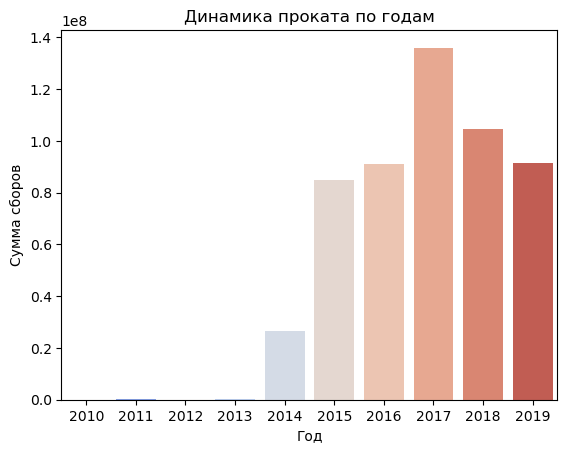

In [48]:
sns.barplot(x='year', y='box_office',data=grouped_year, palette='coolwarm')
plt.title('Динамика проката по годам')
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.show()

*Так же и за 2017 год больше всего было сборов, почти 140.000.000*

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [49]:
mean_box_office=df.pivot_table(index='year', values='box_office', aggfunc=['mean','median'])
mean_box_office

,mean,median
,box_office,box_office
year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000


*С 2015 года заметен тренд, можно сделать предположение что в эти года хорошо заработали какие-то болкбастеры, но и в тоже время обычные фильмы тоже показывают небольшой рост,затем идет небольшой спад*

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

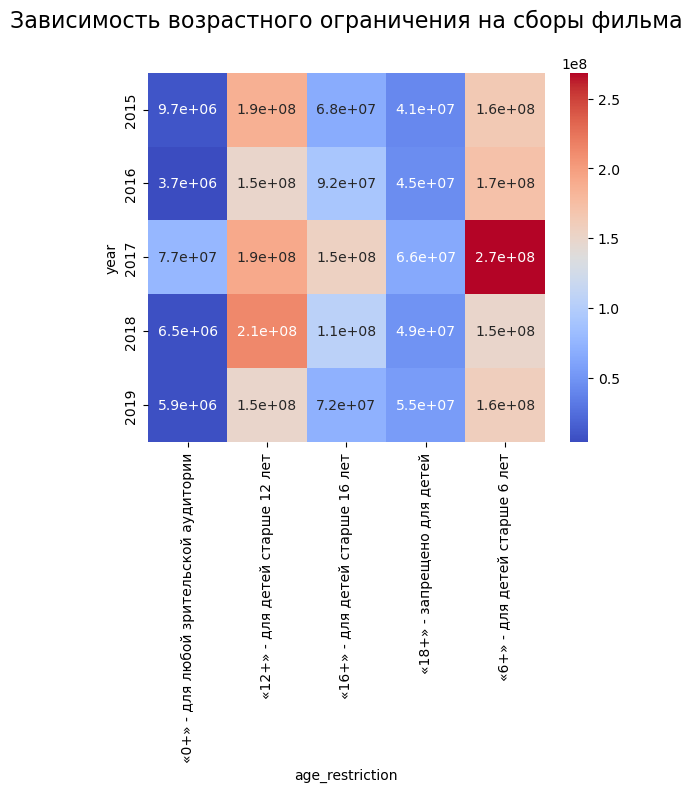

In [50]:
filtered_df=df[(df['year']>=2015)&(df['year']<=2019)]
group_age=filtered_df.pivot_table(index='year',columns='age_restriction',values='box_office')
sns.heatmap(data=group_age, annot=True, cmap='coolwarm')
plt.title('Зависимость возрастного ограничения на сборы фильма', fontsize=16 ,y=1.1)
plt.show()

*По данным с 2015 по 2019 год, заметно что самая болшая сумма сборов была в 2017 году в категории "6+ - для детей старше 6 лет" ,возможно вышел хороший кинофильм , который собрал большую сумму, так как на протяжении 5 лет эта возврастная категория стабильно набирала примерно одинаковую сумму сборов, так же в  глаза бросается категория фильмов старше 12+ лет, за 5 лет показа фильмов , 3 из них были выше среднего по сумме сборов.Можно так же предположить , что 2017 год отличился по сумме сборов из-за того что большая часть данныч о сборах именно за этот год*

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [51]:
df_total_support=df[df['total_support']>0].copy()
df_total_support['total_support']=df_total_support['total_support']/1000000
df_total_support['box_office']=df_total_support['box_office']/1000000
df_total_support

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,total_support,year,general_producer,main_genres,share_support,has_box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,8.1,"драма,мелодрама",0.365354,26.500000,2013,А.Атанесян,драма,33.37,1
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,NaN,unknown,0.028140,26.000000,2014,А.Тютрюмов,unknown,70.00,1
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",19.957031,107.847945,2013,Р.Давлетьяров,комедия,61.27,1
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,4.2,драма,0.055918,28.000000,2014,Л.Антонова,драма,69.01,1
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.4,драма,0.232100,25.000000,2014,А.Миндадзе,драма,62.48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,...,Фонд кино,6.0,"история,биография,драма",717.703186,500.000000,2019,А.Максимов,история,51.02,1
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,...,Фонд кино,6.7,"мультфильм,приключения,семейный",501.069235,100.000000,2019,С.Сельянов,мультфильм,52.63,1
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,...,Фонд кино,5.7,"фантастика,боевик",NaN,500.000000,2019,Ф.Бондарчук,фантастика,52.97,0
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,5.9,драма,NaN,30.000000,2019,С.Зернов,драма,65.00,0


In [52]:
df_total_support.groupby('financing_source')['total_support'].median().reset_index()

,financing_source,total_support
0,Министерство культуры,28.000000
1,"Министерство культуры, Фонд кино",47.751149
2,Фонд кино,60.000000


*Больше всего выдает гос поддержку Фонд кино*

*Проанализируем сколько выделяют средст на поддержку кино по годам*

C:\Users\boyah\AppData\Local\Temp\ipykernel_14868\276746898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year',y='total_support', data=df_total_support_grouped, palette='coolwarm')


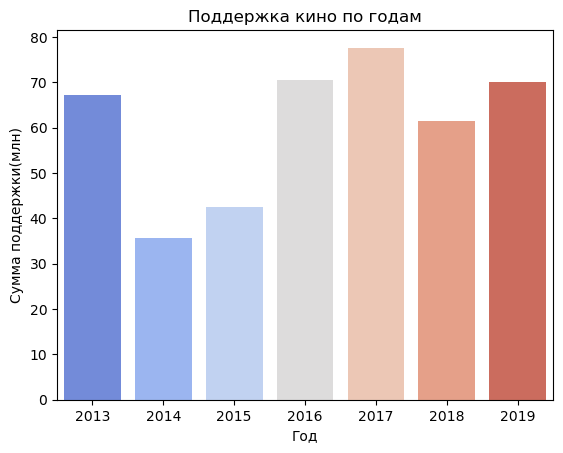

In [53]:
df_total_support_grouped=df_total_support.groupby('year')['total_support'].mean().reset_index()
sns.barplot(x='year',y='total_support', data=df_total_support_grouped, palette='coolwarm')
plt.title('Поддержка кино по годам')
plt.xlabel('Год')
plt.ylabel('Сумма поддержки(млн)')
plt.show()

*В 2013 году поддержка была на уровне 2016,2017 и 2019 годов, с 2015 года идет нарастающий тренд*

*Проанализируем какие жанры больше всего получают господдержку*

C:\Users\boyah\AppData\Local\Temp\ipykernel_14868\1060575124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='main_genres',y='total_support', data=df_main_genres, palette='coolwarm')


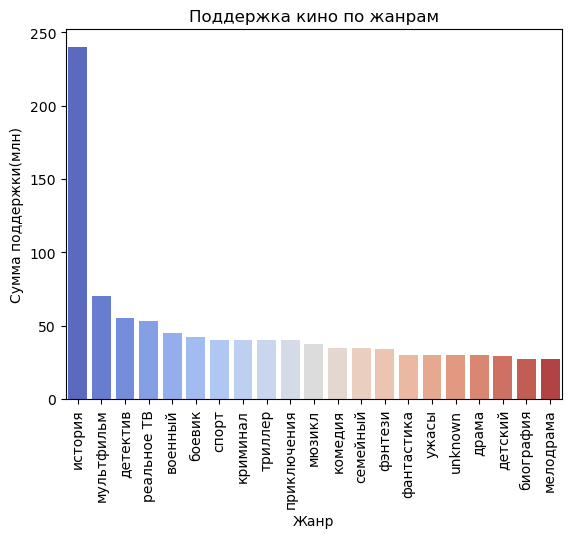

In [54]:
df_main_genres=df_total_support.groupby('main_genres')['total_support'].median().reset_index().sort_values(by='total_support',ascending=False)
sns.barplot(x='main_genres',y='total_support', data=df_main_genres, palette='coolwarm')
plt.title('Поддержка кино по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Сумма поддержки(млн)')
plt.xticks(rotation=90)
plt.show()

*Больше всего получает гос.поддержку фильмы, в которых присутствует жанр истории*

*Проверим окупаемость фильмов*

C:\Users\boyah\AppData\Local\Temp\ipykernel_14868\2864334608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='main_genres',y='box_office', data=df_box_office, palette='coolwarm')


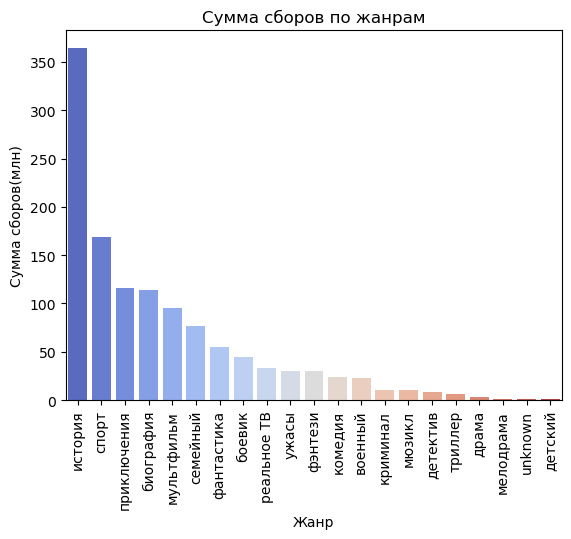

In [55]:
df_box_office=df_total_support.groupby('main_genres')['box_office'].median().reset_index().sort_values(by='box_office',ascending=False)
sns.barplot(x='main_genres',y='box_office', data=df_box_office, palette='coolwarm')
plt.title('Сумма сборов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Сумма сборов(млн)')
plt.xticks(rotation=90)
plt.show()

*Сборы по жанру "истории" превышают гос поддержку, так же можно отметить жанры "спорт","биография","приключения"*

*Проанализируем рейтинг данных фильмов*

C:\Users\boyah\AppData\Local\Temp\ipykernel_14868\2229157634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='main_genres',y='ratings', data=df_ratings, palette='coolwarm')


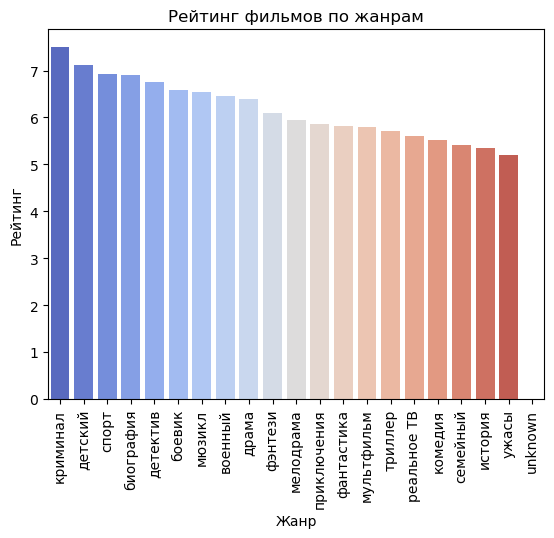

In [56]:
df_ratings=df_total_support.groupby('main_genres')['ratings'].mean().reset_index().sort_values(by='ratings',ascending=False)
sns.barplot(x='main_genres',y='ratings', data=df_ratings, palette='coolwarm')
plt.title('Рейтинг фильмов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')
plt.xticks(rotation=90)
plt.show()

*Фильмы с жанром "спорт" находятся выше среднего по рейтингу,рейтинг жанра "история", ниже среднего*

*Посмотрим какие режисёры отличились в жанре "спорт"*

In [57]:
df_total_support[df_total_support['main_genres']=='спорт']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,total_support,year,general_producer,main_genres,share_support,has_box_office
3135,Чемпионы: Быстрее. Выше. Сильнее,111021115,2015-12-22 12:00:00,Художественный,"ООО ""Энджой мувиз""",Россия,А.Аксененко,"Г.Малков, В.Поляков",«6+» - для детей старше 6 лет,0.0,...,Фонд кино,7.0,"спорт,драма",168.688859,40.0,2015,Г.Малков,спорт,44.31,1
3785,Эластико,111016416,2016-10-18 12:00:00,Художественный,"ООО ""Пятый элемент"", ООО ""РЕНОВАЦИО интертейнм...",Россия,М.Расходников,"Г.Малков, В.Поляков, Е.замалиев, А.Кузьминов, ...",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,6.3,"спорт,мелодрама,криминал",19.393384,15.0,2016,Г.Малков,спорт,50.00,1
5653,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,...,Фонд кино,7.5,"спорт,драма",2779.686144,400.0,2017,Л.Верещагин,спорт,67.77,1


In [58]:
df_total_support[df_total_support['main_genres']=='биография']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,total_support,year,general_producer,main_genres,share_support,has_box_office
2132,Битва за Севастополь,111001415,2015-02-20 12:00:00,Художественный,"ООО ""Кинокомпания ""Новые люди"", ООО ""Студия ""К...",Россия-Украина,С.Мокрицкий,"Н.Мокрицкая, Е.Олесов",«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,7.5,"биография,военный,драма",401.804462,27.51,2015,Н.Мокрицкая,биография,21.00,1
6032,Облепиховое лето,111011618,2018-08-01 12:00:00,Художественный,"ООО ""Кино-Арт"", АО ""ТПО ""СДФ""",Россия,В.Алфёров,"А.Тельнов, Е.Григорьев, В.Харьков",«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,6.3,"биография,драма",0.988413,25.00,2018,А.Тельнов,биография,66.00,1
7330,Лев Яшин. Вратарь моей мечты,111018719,2019-11-21 12:00:00,Художественный,"ООО ""Кремлин Филмз""",Россия,В.Чигинский,О.Капанец,«6+» - для детей старше 6 лет,0.0,...,Министерство культуры,6.9,"биография,спорт,драма",114.090163,60.00,2019,О.Капанец,биография,16.66,1


In [59]:
df_total_support[df_total_support['main_genres']=='история']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,total_support,year,general_producer,main_genres,share_support,has_box_office
5569,Легенда о Коловрате,111007617,2017-11-30 12:00:00,Художественный,"ООО ""Продюсерский центр ИВАН""",Россия,И.Шурховецкий,"ООО ""Централ Партнершип"", АО ""Тел...",«12+» - для детей старше 12 лет,100000000.0,...,Фонд кино,6.4,"история,боевик,фэнтези",590.405065,350.0,2017,"ООО ""Централ Партнершип""",история,70.00,1
6699,Тобол,111002419,2019-02-16 12:00:00,Художественный,"ООО Кинокомпания ""Соливс"" по заказу АО ""ВБД Груп""",Россия,"И.Зайцев, О.Урушев","Э.Илоян, В.Шляппо, Д.Жалинский, А.Троцюк, О.Ур...",«16+» - для детей старше 16 лет,0.0,...,Фонд кино,5.8,"история,драма",138.162877,130.0,2019,Э.Илоян,история,26.01,1
6862,На Париж,111006819,2019-05-02 12:00:00,Художественный,"ООО ""БЛИЦ ФИЛЬМ""",Россия,С.Саркисов,"С.Саркисов, А.Жижневский, Р.Юсипов, В.Колесник",«18+» - запрещено для детей,0.0,...,Министерство культуры,3.2,"история,приключения",9.197108,40.0,2019,С.Саркисов,история,24.21,1
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,...,Фонд кино,6.0,"история,биография,драма",717.703186,500.0,2019,А.Максимов,история,51.02,1


### Шаг 5. Напишите общий вывод

***Итоговый отчет по исследованию изучения рынка российского кинопроката***

*Цели проекта:*

1. Изучить рынок российского кинопроката и выявить текущие тренды.

2. Изучить фильмы ,получившие гос. поддержку, и понять насколько такие фильмы интересны зрителю.

3. Узнать какие факторы влияют на появление новых трендов.

**Ключевые этапы исследования**

1. Больше всего выделяет средства на поддерку "Фонд кино"

2. Высокая сумма сборов на категорию фильмов "6+" и "12+", с 2017 по 2019 год сумма сборов была 580 млн. и 550 млн.

3. Сумма гос. поддержки с 2017 по 2019 составляет примерно 206 млн.

4. Жанр "История" больше всего получается гос поддержку-около 250 млн. 

5. Сумма сборов также больше всего в жанре "История" , но в процентном соотношении суммы поддержки и суммы сборов , первое место занимает жанр спорта , почти в 300 % превышает сумма сборов, так же нафоне остальных выделяются жанры "Биография" и "Приключения"

6. Высокий рейтинг у жанров "Биография" и "Спорт"

7. Лучший фильм по меркам суммы сборов и рейтингу в жанре "Спорт" снял продюсер Л.Верещагин при поддерке в 400 млн. сумма сборов составила 2.779 млрд.

8. Лучший фильм по меркам суммы сборов и рейтингу в жанре "Биография" сняла продюсер Н.Мокрицкая при поддержке в 27 млн. сумма сборов 400 млн.

9. Лучший фильм по меркам суммы сборов и рейтингу в жанре "История"  снял ООО "Централ Партнершип" при поддержке в 70млн. сумма сборов 350 млн.

**Рекомендации для бизнеса**

1. Основной источник финансирования -"Фонд Кино". Необходимо повысить финансирование , для большего охвата рынка российского кинопроката.

2. Рассмотреть проекты в жанре "История" так как этот проект показывает высокие сборы

3. Жанры с васоким потенциалом:
- "Спорт" максимально рентабельный (сборы в 300% от объема поддержки)
- "Биографи" высокий рейтинг и эффективность поддержки
- "Приключения" Жанр с хорошей перспективой по соотношению поддержки и сборов
- Для долгосрочной стратегии стоит инвестировать в жанр "Истории" , который приносит высокие сборы

4. Основные категории зрителей — аудитория "6+" и "12+", на долю которой приходится значительная часть сборов (580 млн руб. и 550 млн руб. в 2017–2019 гг.).Разрабатывать семейные фильмы и блокбастеры, которые могут заинтересовать детей и подростков.

5. Несмотря на высокие сборы, нужно улучшать маркетинг для всех жанров, особенно для тех, которые не получают государственной поддержки. Например, жанр "Приключения" и "Биография" при правильной рекламной стратегии могут привлечь дополнительную аудиторию.Делать акцент на продвижении через каналы, ориентированные на семейные ценности и спорт.

6. Оптимизация бюджета:
- Инвестировать в проекты с наиболее высокой рентабельностью. Например, жанры "Биография" и "Спорт" требуют меньше затрат на поддержку по сравнению с полученными сборами.
- Искать способы снижения затрат на производство фильмов в жанре "История", чтобы улучшить их процентную рентабельность.

